<a href="https://colab.research.google.com/github/briangeorg/Machine_Learning_Portfolio/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What's Our Project?**

We're working cross-functionally with HR to evaluate employee data; the project is to predict which employees are most likely to leave the company, enabling the organization to implement a retention program.

**Exploratory Data Analysis**:

Once we've understood the data here, we'll work in our next notebook to develop, compare and select the best predictive model to classify which employees are at-risk of attrition.

**Getting Started**: Download your dataset

Here, we're working with Kaggle's IBM HR Analytics Dataset.

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "pavansubhasht/ibm-hr-analytics-attrition-dataset",
  file_path
)
# View csv data below for a basic understanding:
print("First 5 records:", df.head())

/tmp/ipython-input-3932391491.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'ibm-hr-analytics-attrition-dataset' dataset.
First 5 records:    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical    

**Visualize Our Data**

We'll start with all numeric factors.

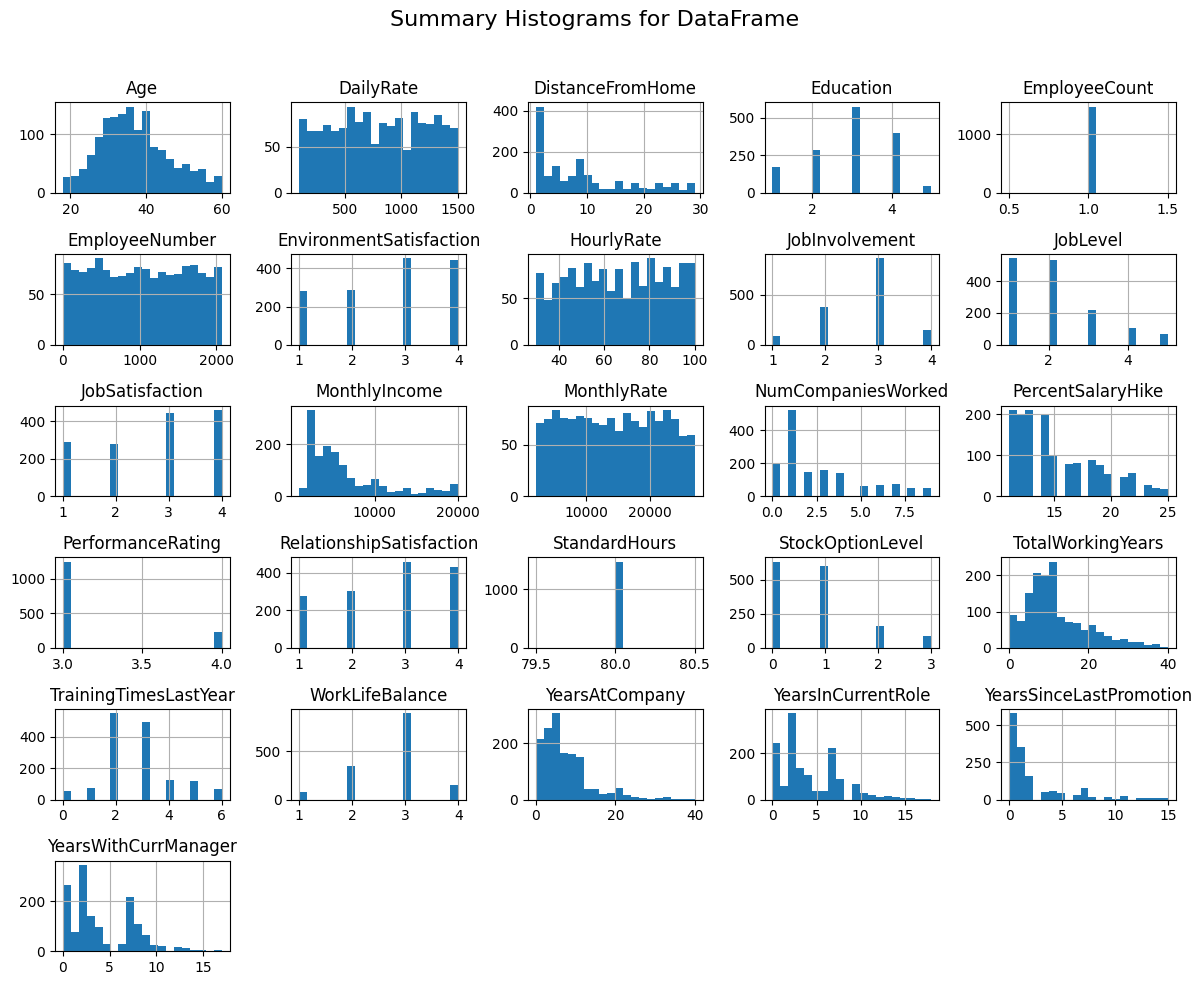

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate histograms for all numeric columns
df.hist(figsize=(12, 10), bins=20)

# 2. Add a title and adjust the layout for readability
plt.suptitle('Summary Histograms for DataFrame', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for subtitle
plt.show()

**Initial Takeaways**



*   Employee Count - uniform count value == 1 means this variable has zero variance, and thus cannot contribute to any modeling
*   Standard Hours - we don't need a statistic to see this column has 0 variance, meaning we will not be using this either!

**Next:** let's review for outliers...



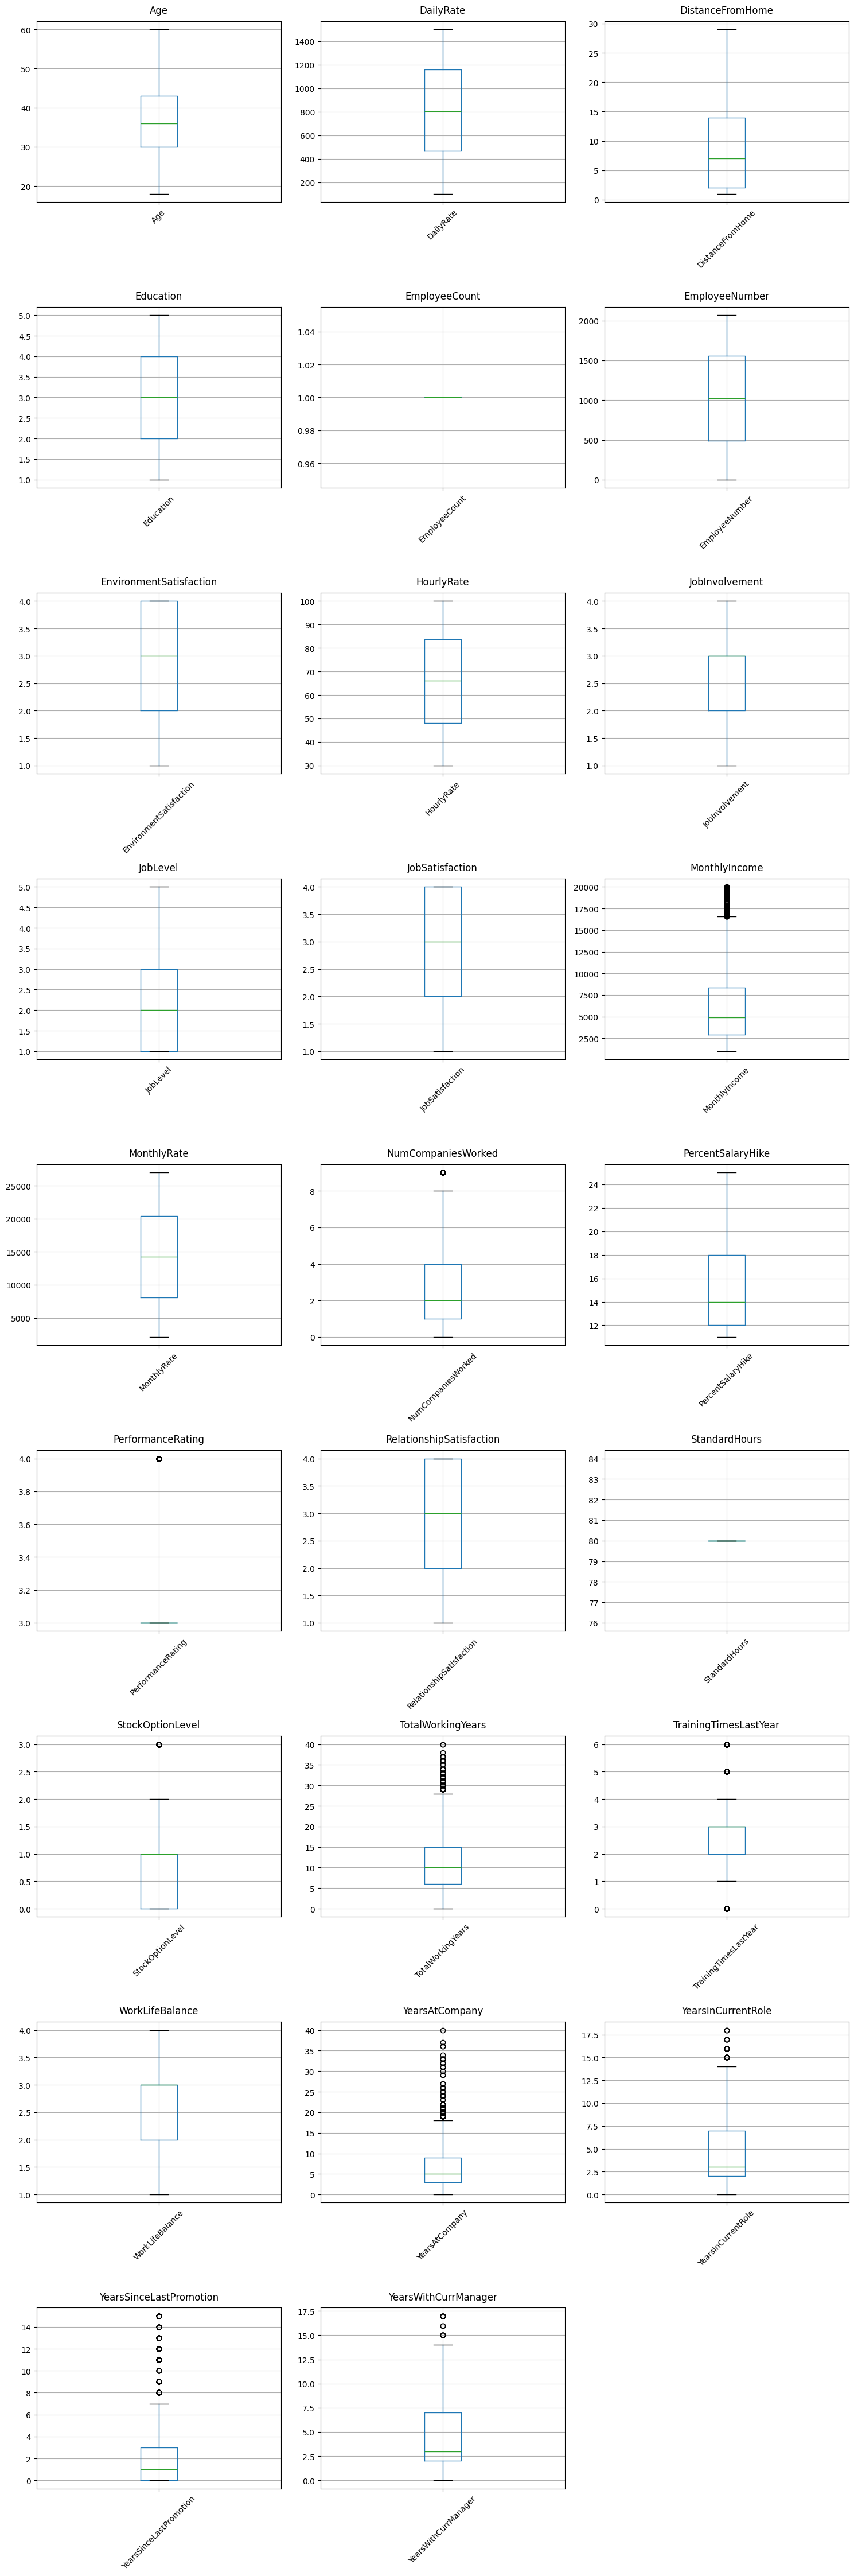

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_boxplots(df, cols_per_row=3, figsize=(15, 5)):
    """
    Create box-and-whisker plots for all numeric columns, but
    we don't want our labels to be unreadable: we'll use a this function
    to fix the layout.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        cols_per_row (int): Number of plots per row.
        figsize (tuple): Size of each row of subplots (width, height).
    """
    numeric_cols = df.select_dtypes(include='number').columns
    n_cols = len(numeric_cols)

    if n_cols == 0:
        print("No numeric columns found.")
        return

    # Number of rows needed
    n_rows = -(-n_cols // cols_per_row)  # ceiling division

    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(figsize[0], figsize[1]*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]

    for i, col in enumerate(numeric_cols):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col, fontsize=12, pad=10)
        axes[i].tick_params(axis='x', rotation=45)

    # Hide unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Actual Plot:
plot_boxplots(df, cols_per_row=3, figsize=(15, 5))


**Outlier Takeaways**: We can observe, across many of our variables a substantial volume of what we might call "outliers". However, in the context of these data, are the values extreme only in relation to interquartile range? Or do they represent values so extreme as to be unlikely or non-representative in the population of interest (future employees about whom we want to predict outcomes)?

**Most Seem Fine**: First, I would argue the outliers we observe are intuitively sensible: many are simply long-term employees; those who've held many positions across several companies; or those with unusually long periods since their last promotion--these are all values that appear to be expected in the population, and thus we want any model to learn on them.

**What Do We Need to Know?**: Our assumed project is to build a classification model to predict employees who are likely to leave the company. If that's so, one thing we *don't want* to capture in our model is the noise of retiring employees! Luckily, we can see from our Age variable, the maximum age in this data set is 60--so while this may approach retirement age, our data should not require cleaning to avoid mixing noise with our signal.

**Next: Descriptive Statistics**

In [4]:
# Use .describe() with include='all'
pd.set_option('display.max_columns', None)
summary_all = df.describe(include='all')

print("Summary statistics for all columns:\n")
print(summary_all)

Summary statistics for all columns:

                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN         

**Any Other Issues?**:

We can see that the Over 18 variable has one unique value--so all our workers are over 18, and like our zero-variance numeric features, we will want to ignore this one, too!

**Moving On!**

From here, we can set up our modeling pipeline in the next workbook!